In [2]:
# Author : Shreyas Shashikant Vaishnav
# Purpose : Random Forest
# Dataset : Company_Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing      

In [3]:
company = pd.read_csv(r"D:\Resume\Data Science\Assignments_SV\Data Science Assignment\Random Forest\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.shape

(400, 11)

In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
corr = company.corr()

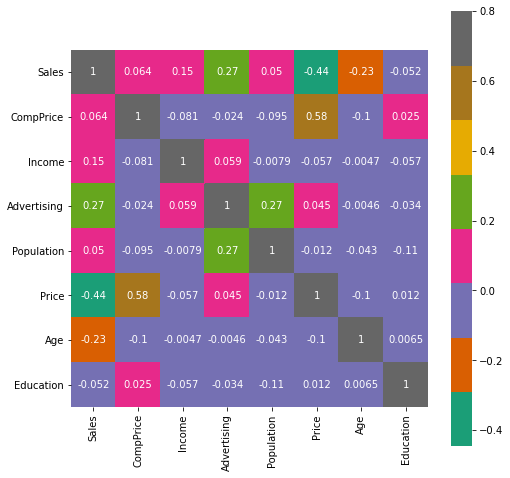

In [11]:
import seaborn as sns
fig = plt.figure(figsize = (8, 8))
sns.heatmap(corr, vmax = .8, square = True , annot = True, cmap="Dark2")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


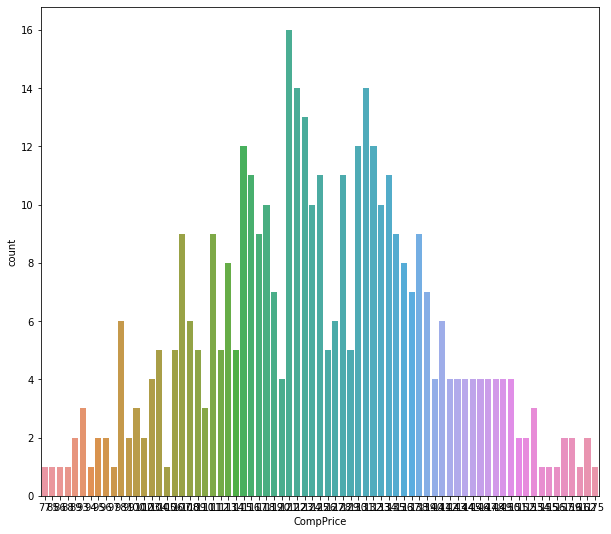

In [24]:
fig = plt.figure(figsize = (10, 9))
sns.countplot(company['CompPrice'])
plt.show()

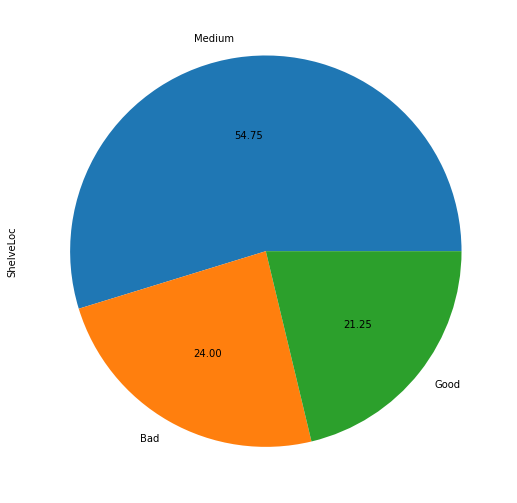

In [26]:
fig = plt.figure(figsize = (10, 9))
company['ShelveLoc'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


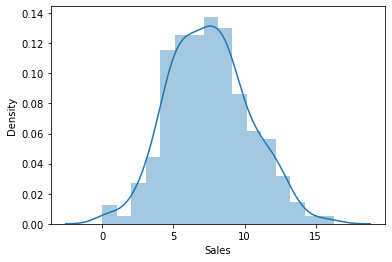

In [27]:
sns.distplot(company['Sales']) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


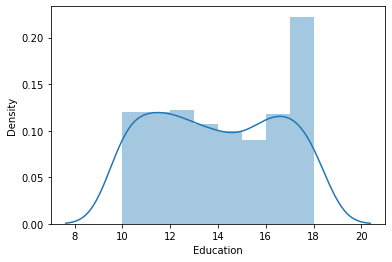

In [28]:
sns.distplot(company['Education']) 
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='Population'>

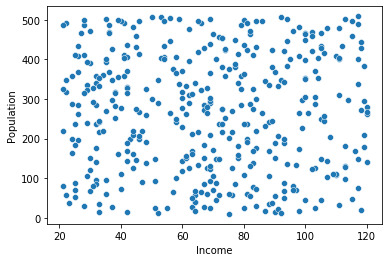

In [29]:
sns.scatterplot(company["Income"], company["Population"])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


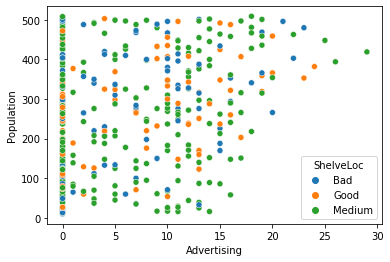

In [32]:
sns.scatterplot(company["Advertising"], company["Population"], hue=company["ShelveLoc"])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


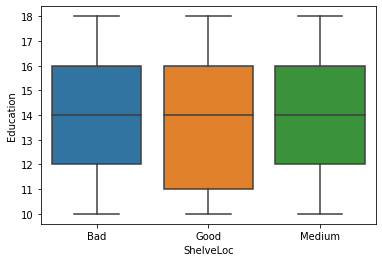

In [35]:
sns.boxplot(company['ShelveLoc'], company["Education"])
plt.show()

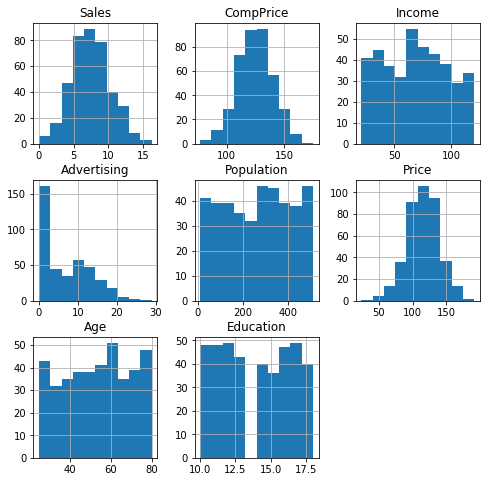

In [19]:
# Plot histograms of each parameter 
plt.style.use('_classic_test_patch')
plt.style.available
company.hist(figsize = (8, 8))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

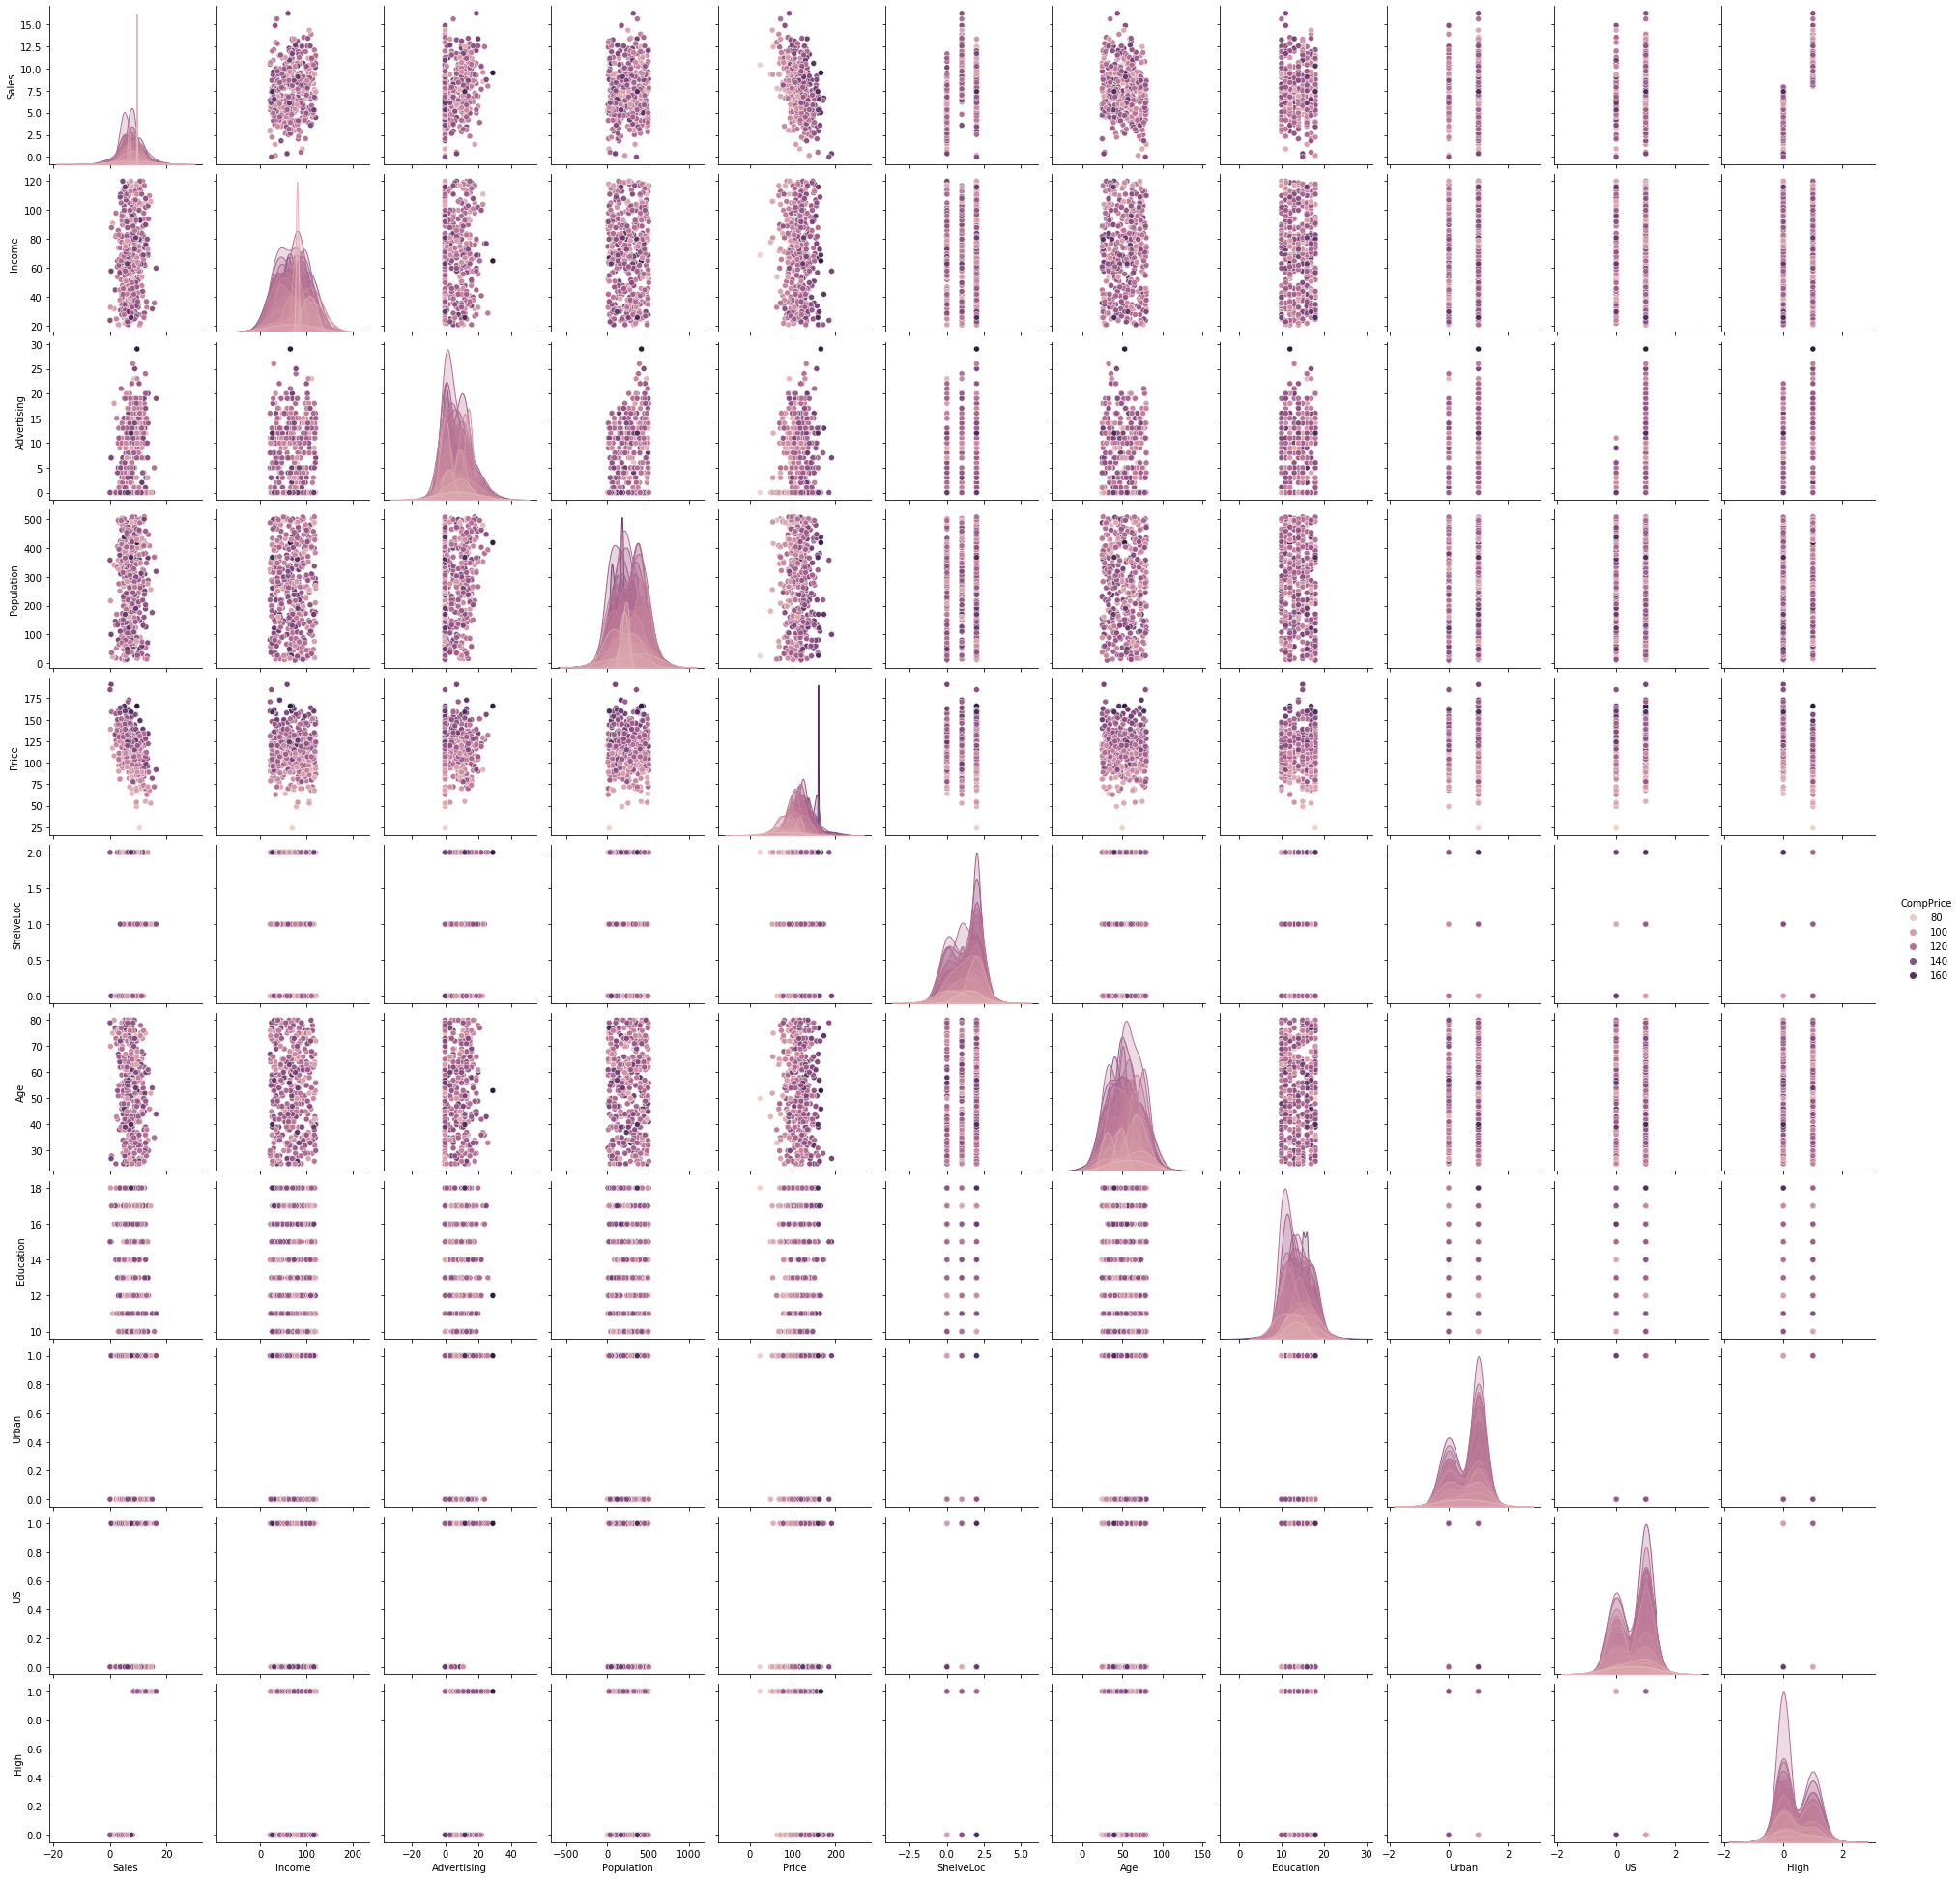

In [76]:
sns.pairplot(company, hue ='CompPrice')
# to show
plt.show()

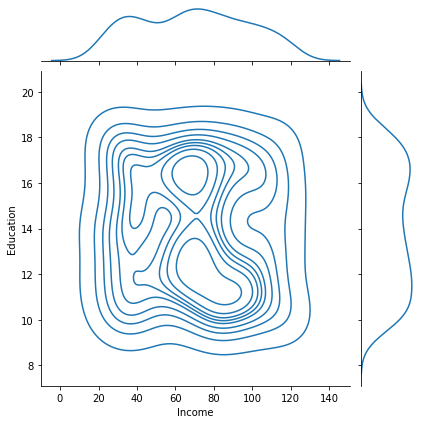

In [77]:
sns.jointplot(x ='Income', y ='Education', data = company, kind ='kde');

In [13]:
# As we have to convert the sales column into categorical column so need to calculate the mean first and 
# then using lambda function categorize that column into 0's and 1's according to the mean
sales_mean = company.Sales.mean()
sales_mean

7.496325

In [20]:
company['High'] = company.Sales.map(lambda x: 1 if x > 8 else 0)

In [21]:
company.High.head()

0    1
1    1
2    1
3    0
4    0
Name: High, dtype: int64

In [44]:
# Displaying the unique values, there are only two unique values 0 and 1, for high sales(sales>8) it is 1 and for low sales(sales<8) it is 0

company['High'].unique()

array([1, 0], dtype=int64)

In [45]:
company.High.value_counts()

0    236
1    164
Name: High, dtype: int64

In [36]:
company.head()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [37]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])

In [38]:
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [51]:
# Splitting the data into x and y as input and output

X = company.iloc[:,1:11]
Y = company['High']

In [52]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [53]:
Y.head()

0    1
1    1
2    1
3    0
4    0
Name: High, dtype: int64

In [54]:
# Splitting the data into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [55]:
RF = RandomForestClassifier(n_jobs=3, oob_score = True, n_estimators=15, criterion="entropy")

In [57]:
RF.fit(x_train, y_train) # Fitting RandomForestClassifier model from sklearn.ensemble 

RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [60]:
from IPython.display import display
display(RF.estimators_)
display(RF.classes_)            # class labels (output)
display(RF.n_classes_)          # Number of levels in class labels 
display(RF.n_features_)         # Number of input features in model 8 here.
display(RF.n_outputs_)          # Number of outputs when fit performed
display(RF.oob_score_*100) 

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1303263776),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=30435712),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1914598542),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=394582697),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=615845419),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=172948762),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1500702870),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=383182950),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
            

array([0, 1], dtype=int64)

2

10

1

80.3125

In [61]:
#Predicting on x_test data for validation
RF.predict(x_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [62]:
y_preds = RF.predict(x_test)
pd.Series(y_preds).value_counts()

0    51
1    29
dtype: int64

In [64]:
# In order to check whether the predictions are correct or wrong we will create a cross tab on y_test data
crosstable = pd.crosstab(y_test,y_preds)
display(crosstable)

col_0,0,1
High,,
0,39,4
1,12,25


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

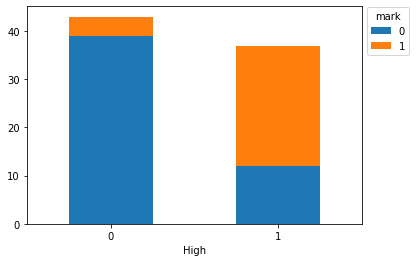

In [74]:

ax = crosstable.plot(kind='bar', stacked=True, rot=0)
ax.legend(title='mark', bbox_to_anchor=(1, 1.02), loc='upper left')

# add annotations if desired
for c in ax.containers:
    
    # set the bar label
    ax.bar_label(crosstable, label_type='center')

In [67]:
# Final step we will calculate the accuracy of our model
# We are comparing the predicted values with the actual values and calculating mean for the matches

score = np.mean(y_preds==y_test)
print(score*100)

80.0


In [68]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83        51
           1       0.68      0.86      0.76        29

    accuracy                           0.80        80
   macro avg       0.79      0.81      0.79        80
weighted avg       0.82      0.80      0.80        80

